In [1]:
# Предсказать параметр medv из датасета Boston Housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\aab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('boston_housing.txt', delimiter = r"\s+", index_col = 0,  names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], encoding = "ISO-8859-1", low_memory = False)

In [3]:
# Все переменные датасета - числовые и в датасете нет пропусков
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1.	crim, per capita crime rate by town.
2.	zn, proportion of residential land zoned for lots over 25,000 sq.ft.
3.	indus, proportion of non-retail business acres per town.
4.	chas, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.	nox, nitrogen oxides concentration (parts per 10 million).
6.	rm, average number of rooms per dwelling.
7.	age, proportion of owner-occupied units built prior to 1940.
8.	dis, weighted mean of distances to five Boston employment centres.
9.	rad, index of accessibility to radial highways.
10.	tax, full-value property-tax rate per 10,000 USD.
11.	ptratio, pupil-teacher ratio by town.
12.	black, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13.	lstat, lower status of the population (percent).
14.	medv, median value of owner-occupied homes in 1000 USDs.


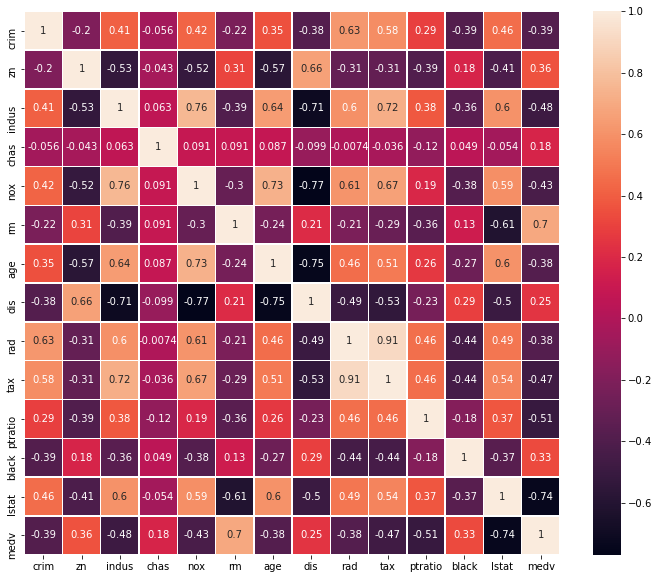

In [4]:
# Построим тепловую карту признаков, чтобы определить, нет ли в датасете сильно коррелирующих между собой переменных
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, ax = ax);

In [5]:
# Признаки rad и tax сильно коррелируют между собой и одинаково коррелируют с другими признаками, 
# поэтому я удалю один из них - rad
df.drop(['rad'], axis = 1, inplace = True)

In [6]:
# Создаем датафреймы признаков и целевой переменной
X = df.copy()
y = pd.DataFrame(df['medv'])
X.drop(['medv'], axis = 1, inplace = True)

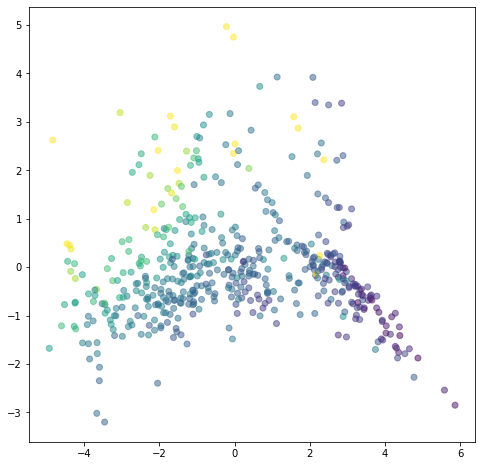

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Применим алгоритм сокращения размерности до 2 и посмотрим диаграмму рассеяния
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

plt.figure(figsize = (8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y['medv'], alpha = 0.5);

На диаграмме видно, что цветные точки группируются в разных частях диаграммы, поэтому можно ожидать приличное качество модели

In [27]:
# попробуем обучить линейную регрессионную модель и сравним ее с наивной моделью
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

#Linear Regressor
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print(f'Mean squared error (наивная модель): {mean_squared_error(y_test, y_predict_dummy_mean):.2f}')
print(f'Mean squared error (линейная): {mean_squared_error(y_test, y_predict):.2f}')
print(f'r2_score (наивная модель): {r2_score(y_test, y_predict_dummy_mean):.2f}')
print(f'r2_score (линейная): {r2_score(y_test, y_predict):.2f}')
print(f'R^2 на тренировочном наборе: {lm.score(X_train, y_train):.2f}')
print(f'R^2 на тестовом наборе: {lm.score(X_test, y_test):.2f}')

Train shape : (379, 12)
Test shape : (127, 12)
Mean squared error (наивная модель): 72.26
Mean squared error (линейная): 23.87
r2_score (наивная модель): -0.03
r2_score (линейная): 0.66
R^2 на тренировочном наборе: 0.74
R^2 на тестовом наборе: 0.66


Разница R^2 на тестовом и тренировочном наборах невелика, поэтому можно сделать вывод, что модель хорошо обобщает данные

In [12]:
result = y.copy()

In [19]:
result['prediction'] = lm.predict(X).round(1)

In [20]:
result.head()

,medv,prediction
1,24.0,30.8
2,21.6,25.1
3,34.7,31.4
4,33.4,29.2
5,36.2,28.6


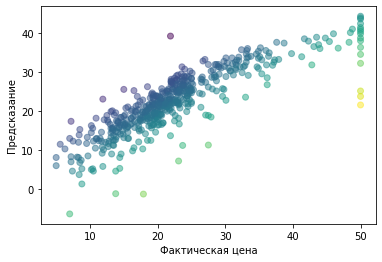

In [24]:
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказание')
plt.scatter(result['medv'], result['prediction'], c = result['medv'] - result['prediction'], alpha = 0.5);

В принципе прогноз и факт ложатся на диагональную прямую. Но у целевой переменной есть несколько (16) максимальных значений равных 50.0, которые плохо предсказываются. Их надо изучать отдельно, они выглядят странно. 

In [25]:
result[result['medv'] == 50.0].count()

medv          16
prediction    16
dtype: int64